In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# 导入模块
import os
import numpy as np
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from matplotlib import pyplot as plt
import torchvision.models as models
import random
from PIL import Image
from torch.utils.data import Dataset

In [2]:
import os
from torchvision import datasets, transforms
import torch

# 设置数据集路径
total_dir = "/Users/fcccasa/Downloads/R/img"

# 定义数据预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 加载数据集
total_data = datasets.ImageFolder(total_dir, transform)

print(total_data.classes)

# 用来存储训练和测试集的索引
train_indices = []
test_indices = []

# 遍历数据集中的每个类别（文件夹）
for class_idx in range(len(total_data.classes)):
    # 获取当前类别所有图像的索引
    class_indices = [i for i, label in enumerate(total_data.targets) if label == class_idx]
    
    # 分割：前40个图像为训练集，剩下的为测试集
    train_indices.extend(class_indices[:40])
    test_indices.extend(class_indices[40:])

# 使用索引创建训练集和测试集
train_dataset = torch.utils.data.Subset(total_data, train_indices)
test_dataset = torch.utils.data.Subset(total_data, test_indices)

# 打印训练集和测试集的大小
print(f'训练集大小: {len(train_dataset)}')
print(f'测试集大小: {len(test_dataset)}')


['-1', '-10', '-100', '-101', '-102', '-103', '-104', '-105', '-106', '-107', '-108', '-109', '-11', '-110', '-111', '-112', '-113', '-114', '-115', '-116', '-117', '-118', '-119', '-12', '-120', '-121', '-122', '-123', '-124', '-125', '-126', '-127', '-128', '-129', '-13', '-130', '-131', '-132', '-133', '-134', '-135', '-136', '-137', '-138', '-139', '-14', '-140', '-141', '-142', '-143', '-144', '-145', '-146', '-147', '-148', '-149', '-15', '-150', '-151', '-152', '-153', '-154', '-155', '-156', '-157', '-158', '-159', '-16', '-160', '-161', '-162', '-163', '-164', '-165', '-166', '-167', '-168', '-169', '-17', '-170', '-171', '-172', '-173', '-174', '-175', '-176', '-177', '-178', '-179', '-18', '-180', '-181', '-182', '-183', '-184', '-185', '-186', '-187', '-188', '-189', '-19', '-190', '-191', '-192', '-193', '-194', '-195', '-196', '-197', '-198', '-199', '-2', '-20', '-200', '-201', '-202', '-203', '-204', '-205', '-206', '-207', '-208', '-209', '-21', '-210', '-211', '-212',

In [3]:
train_dataloader = DataLoader(train_dataset, batch_size=40, shuffle=False, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False, num_workers=1)


In [4]:
print(total_data.class_to_idx)       # {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}
idx_to_class = dict((v, k) for k, v in total_data.class_to_idx.items())
print(idx_to_class)                  # {0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}


{'-1': 0, '-10': 1, '-100': 2, '-101': 3, '-102': 4, '-103': 5, '-104': 6, '-105': 7, '-106': 8, '-107': 9, '-108': 10, '-109': 11, '-11': 12, '-110': 13, '-111': 14, '-112': 15, '-113': 16, '-114': 17, '-115': 18, '-116': 19, '-117': 20, '-118': 21, '-119': 22, '-12': 23, '-120': 24, '-121': 25, '-122': 26, '-123': 27, '-124': 28, '-125': 29, '-126': 30, '-127': 31, '-128': 32, '-129': 33, '-13': 34, '-130': 35, '-131': 36, '-132': 37, '-133': 38, '-134': 39, '-135': 40, '-136': 41, '-137': 42, '-138': 43, '-139': 44, '-14': 45, '-140': 46, '-141': 47, '-142': 48, '-143': 49, '-144': 50, '-145': 51, '-146': 52, '-147': 53, '-148': 54, '-149': 55, '-15': 56, '-150': 57, '-151': 58, '-152': 59, '-153': 60, '-154': 61, '-155': 62, '-156': 63, '-157': 64, '-158': 65, '-159': 66, '-16': 67, '-160': 68, '-161': 69, '-162': 70, '-163': 71, '-164': 72, '-165': 73, '-166': 74, '-167': 75, '-168': 76, '-169': 77, '-17': 78, '-170': 79, '-171': 80, '-172': 81, '-173': 82, '-174': 83, '-175': 84,

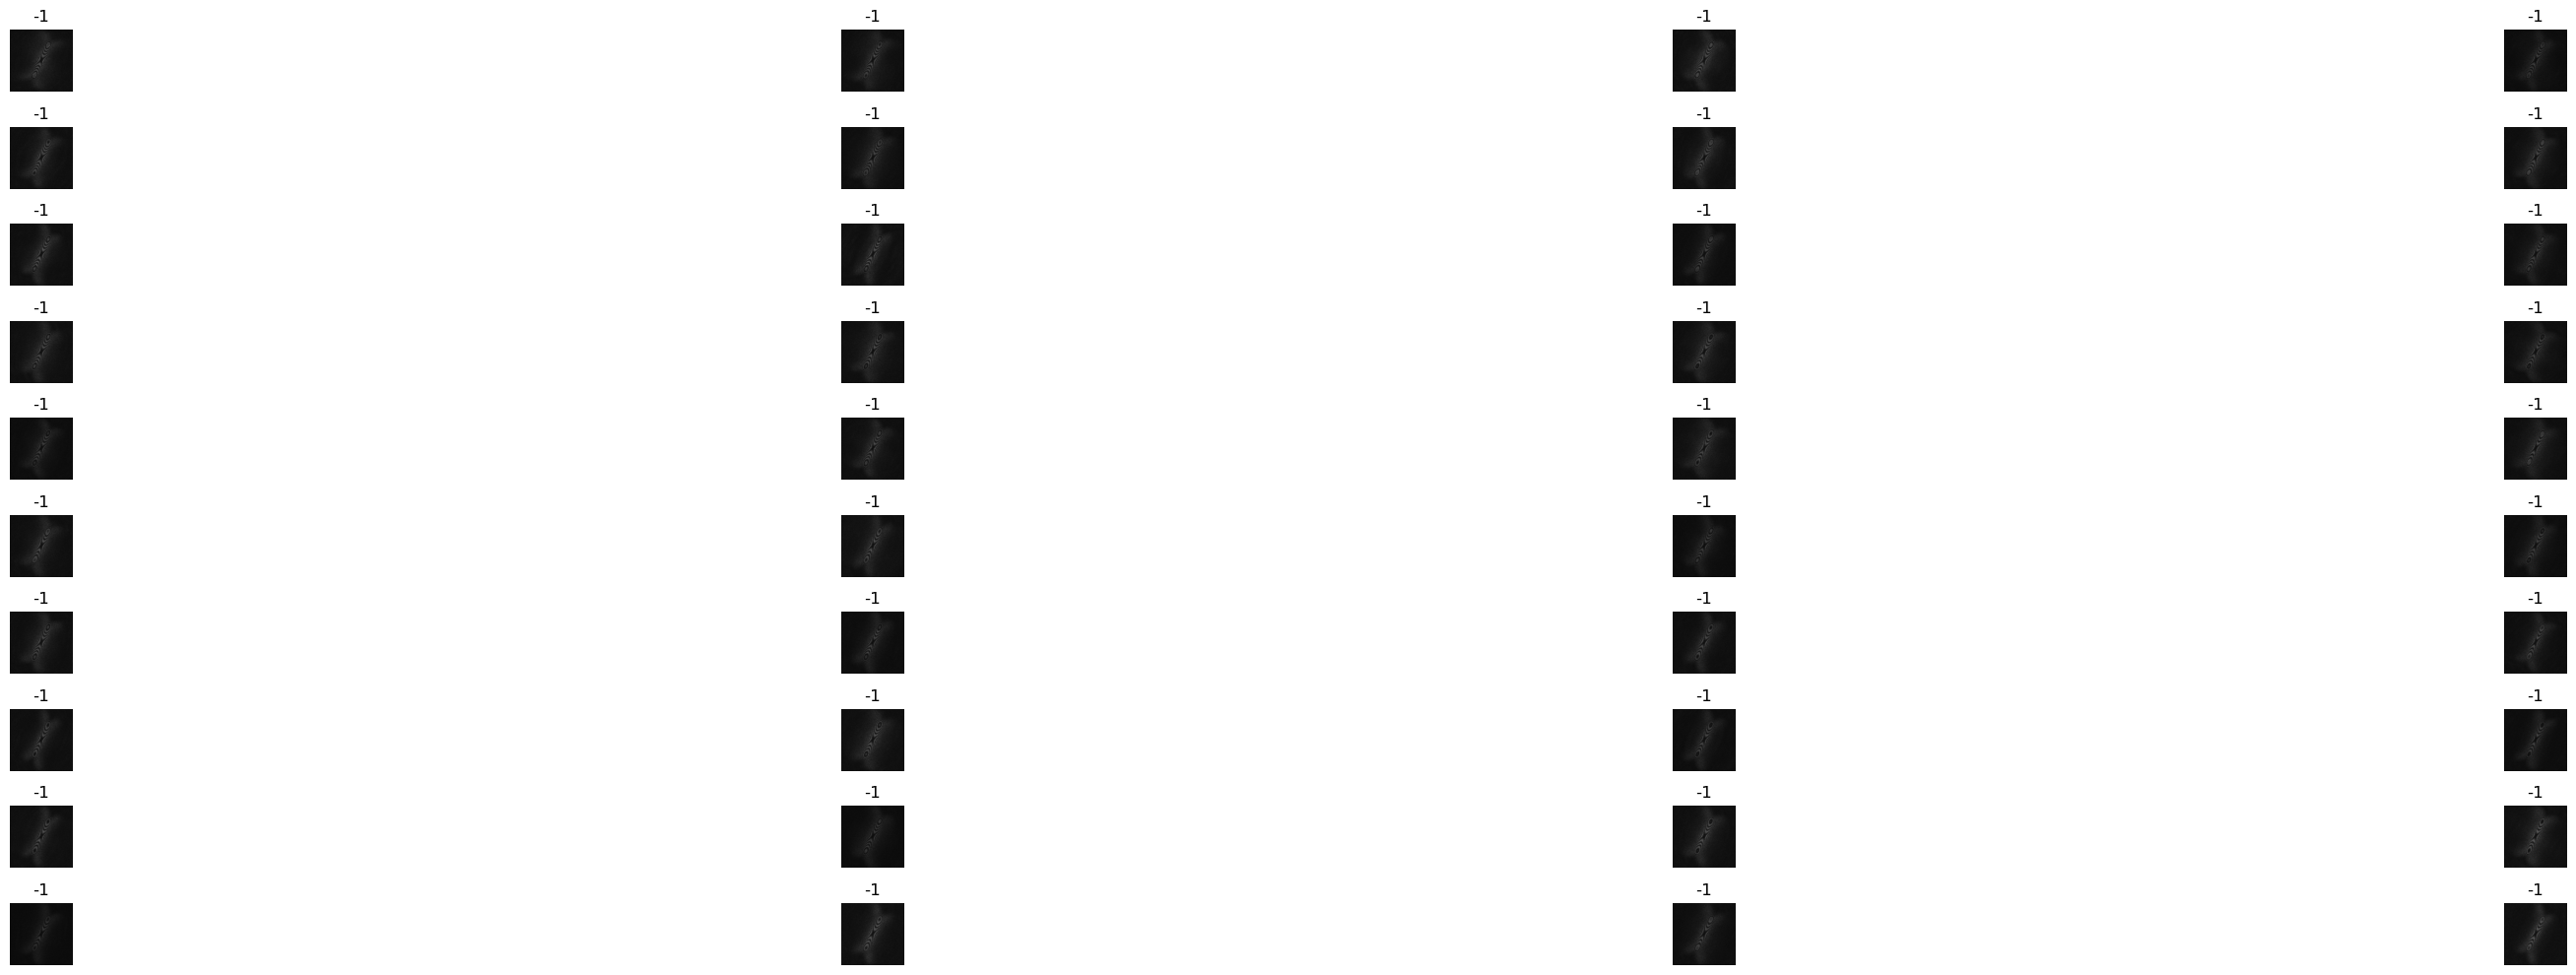

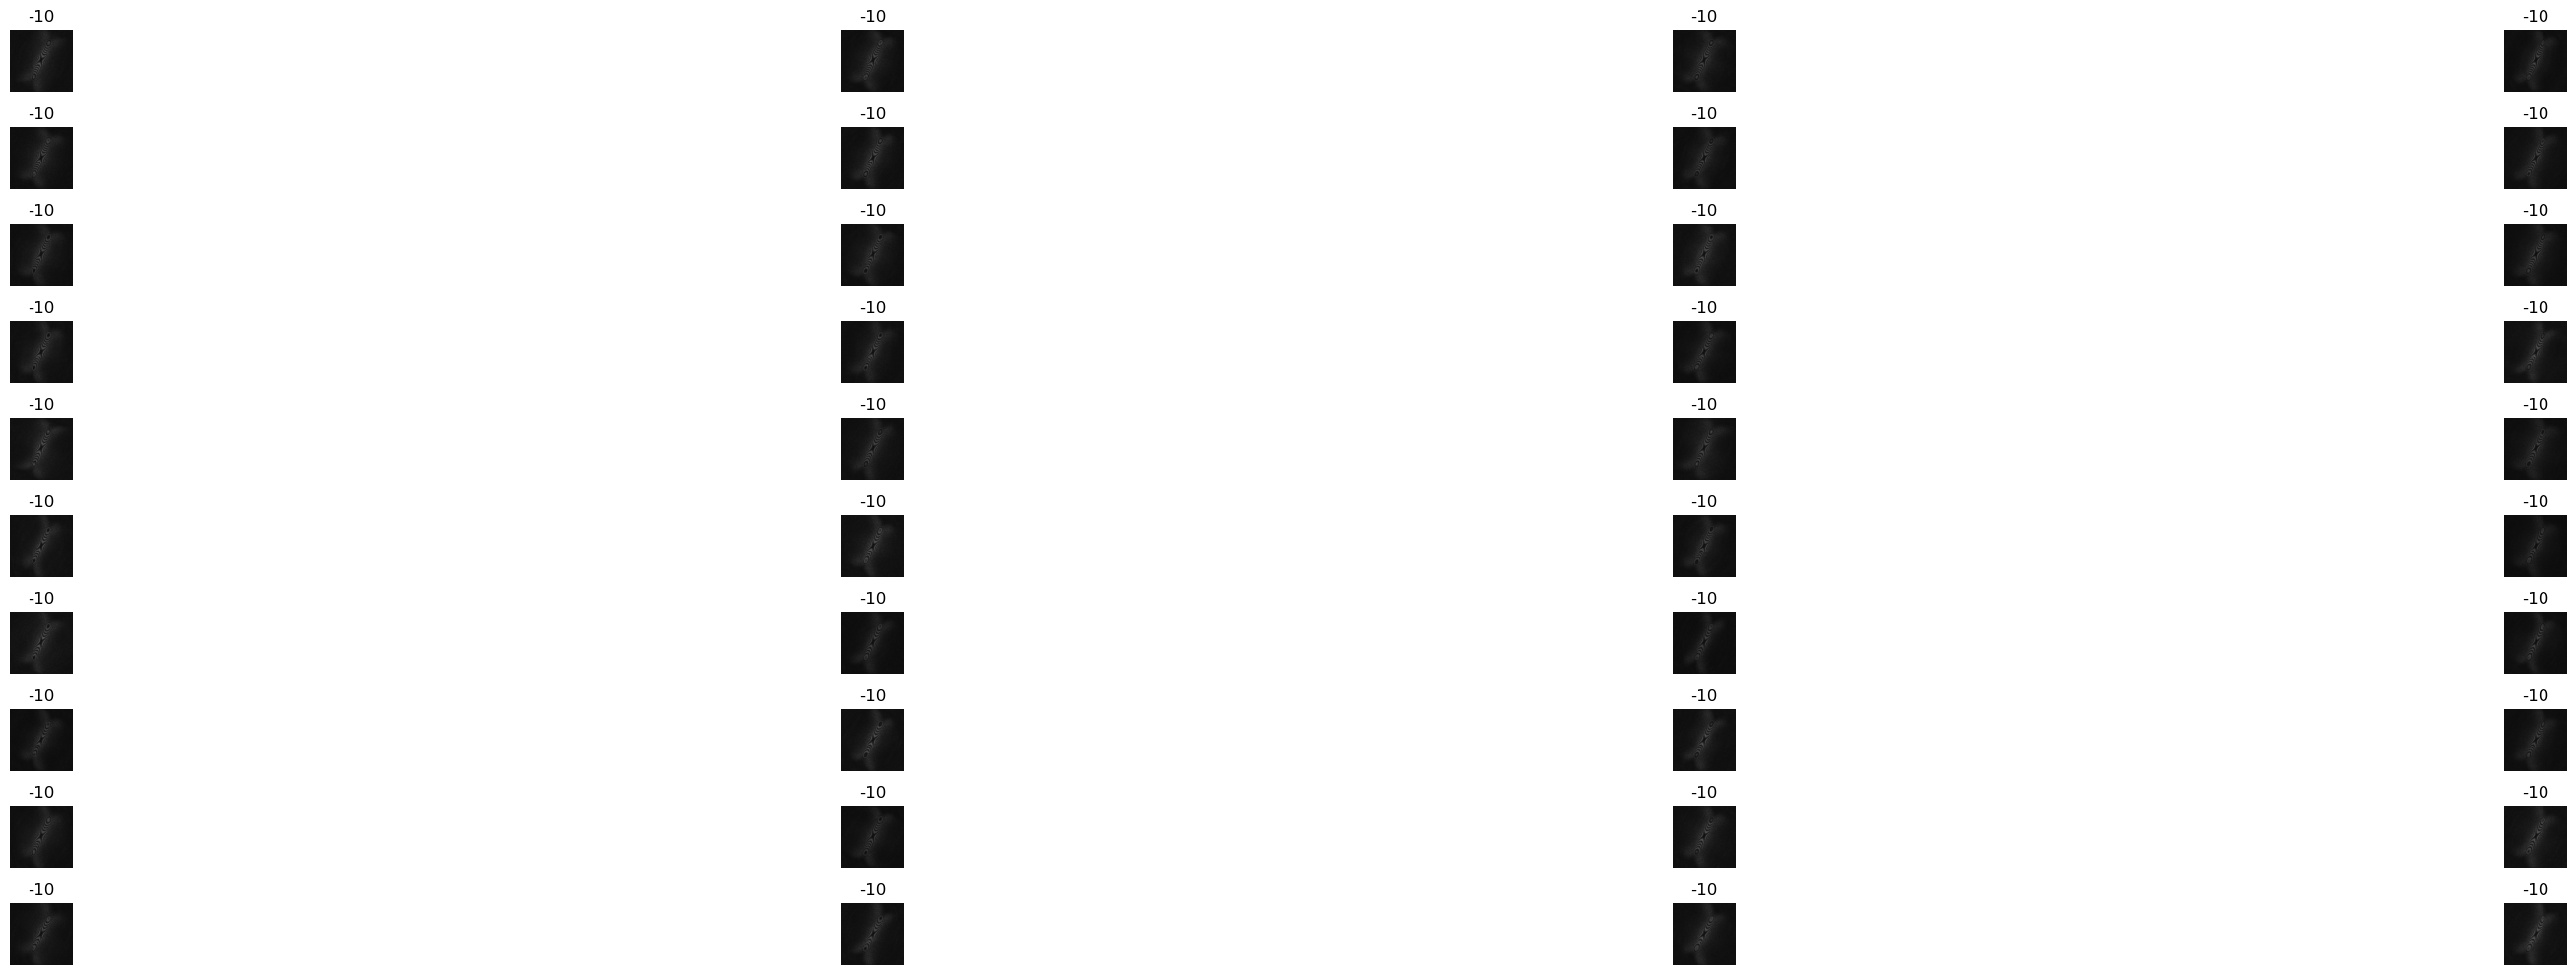

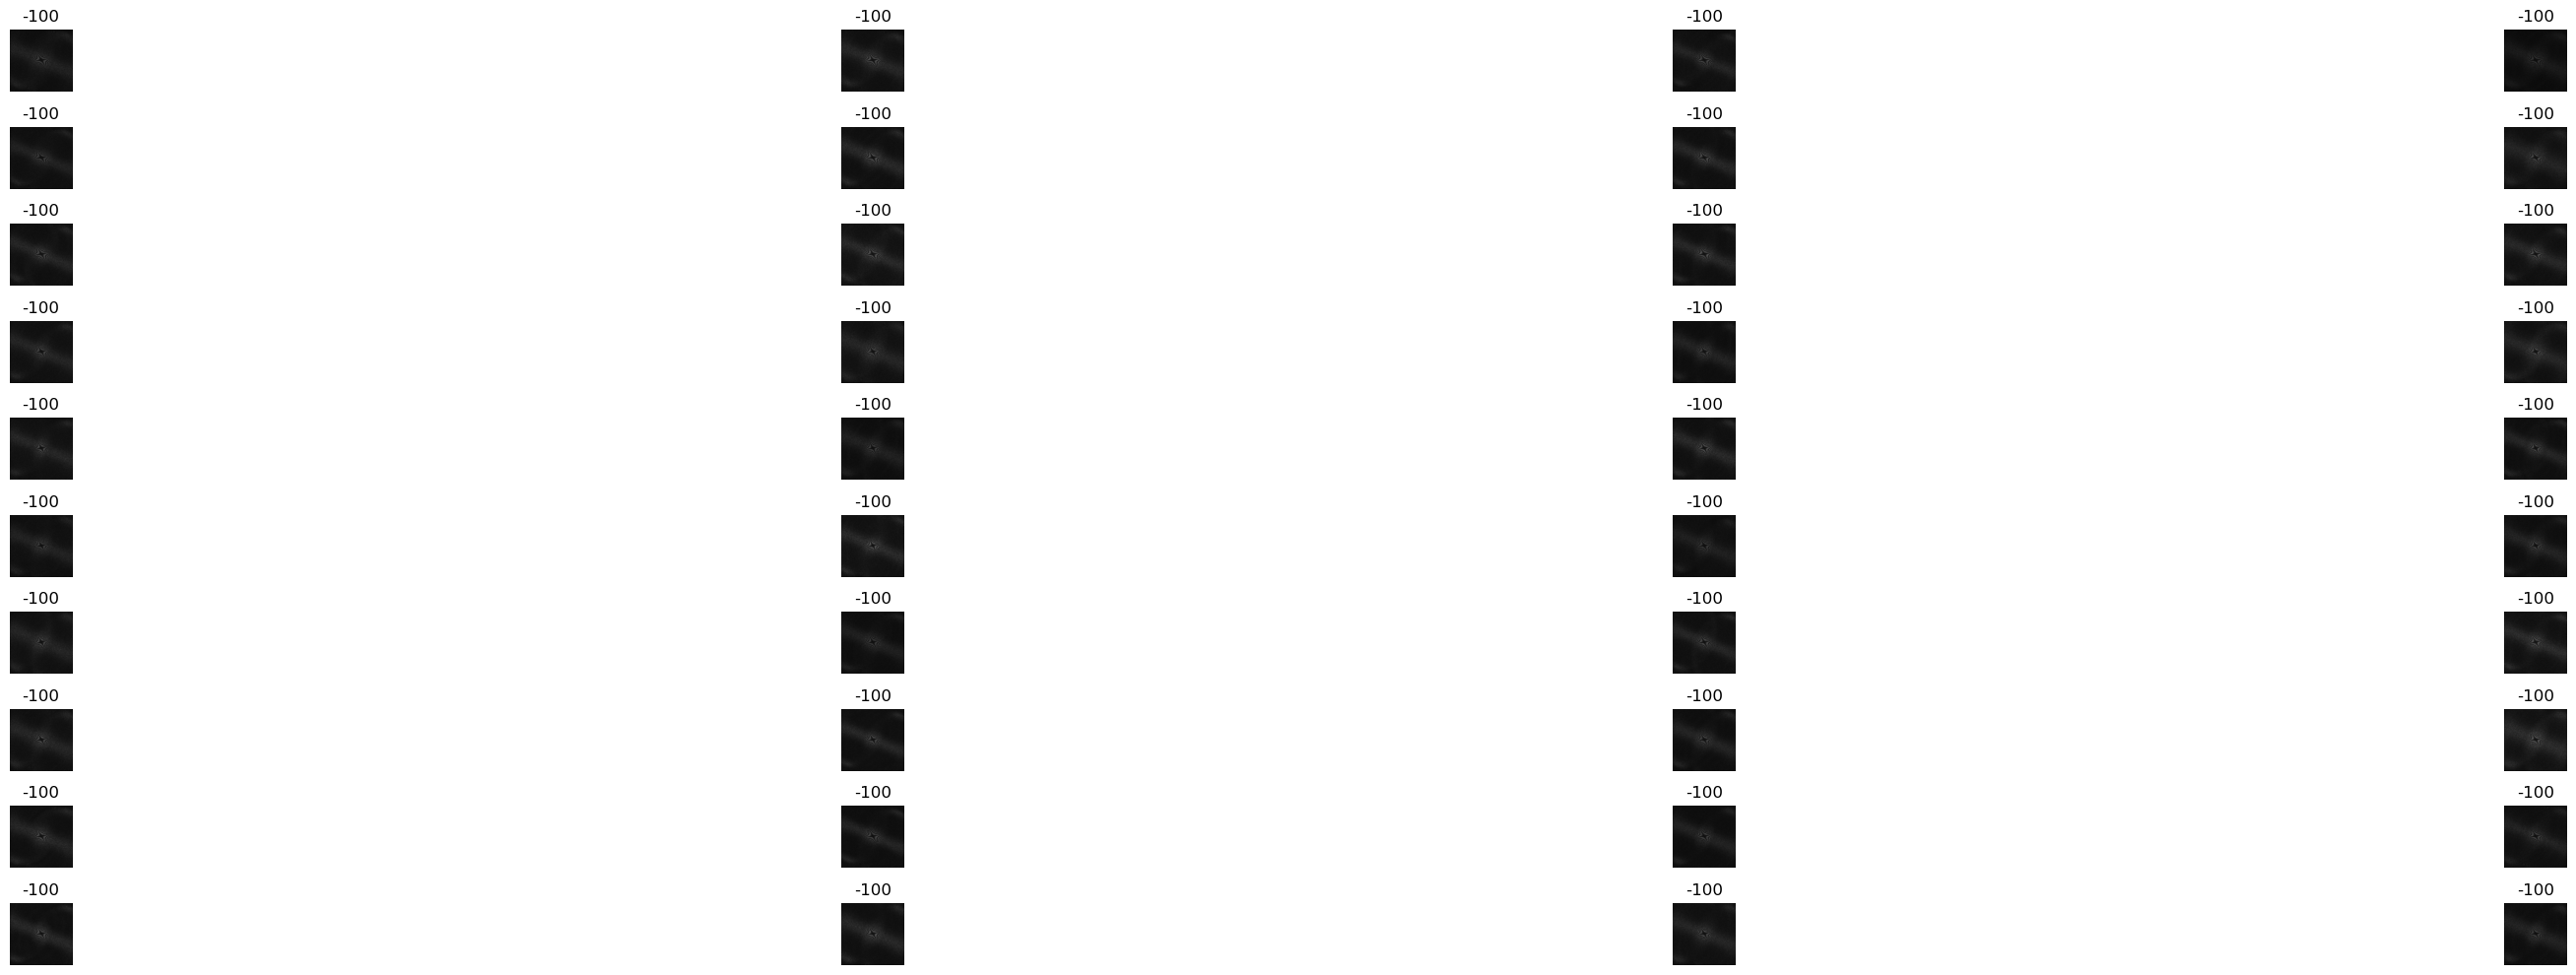

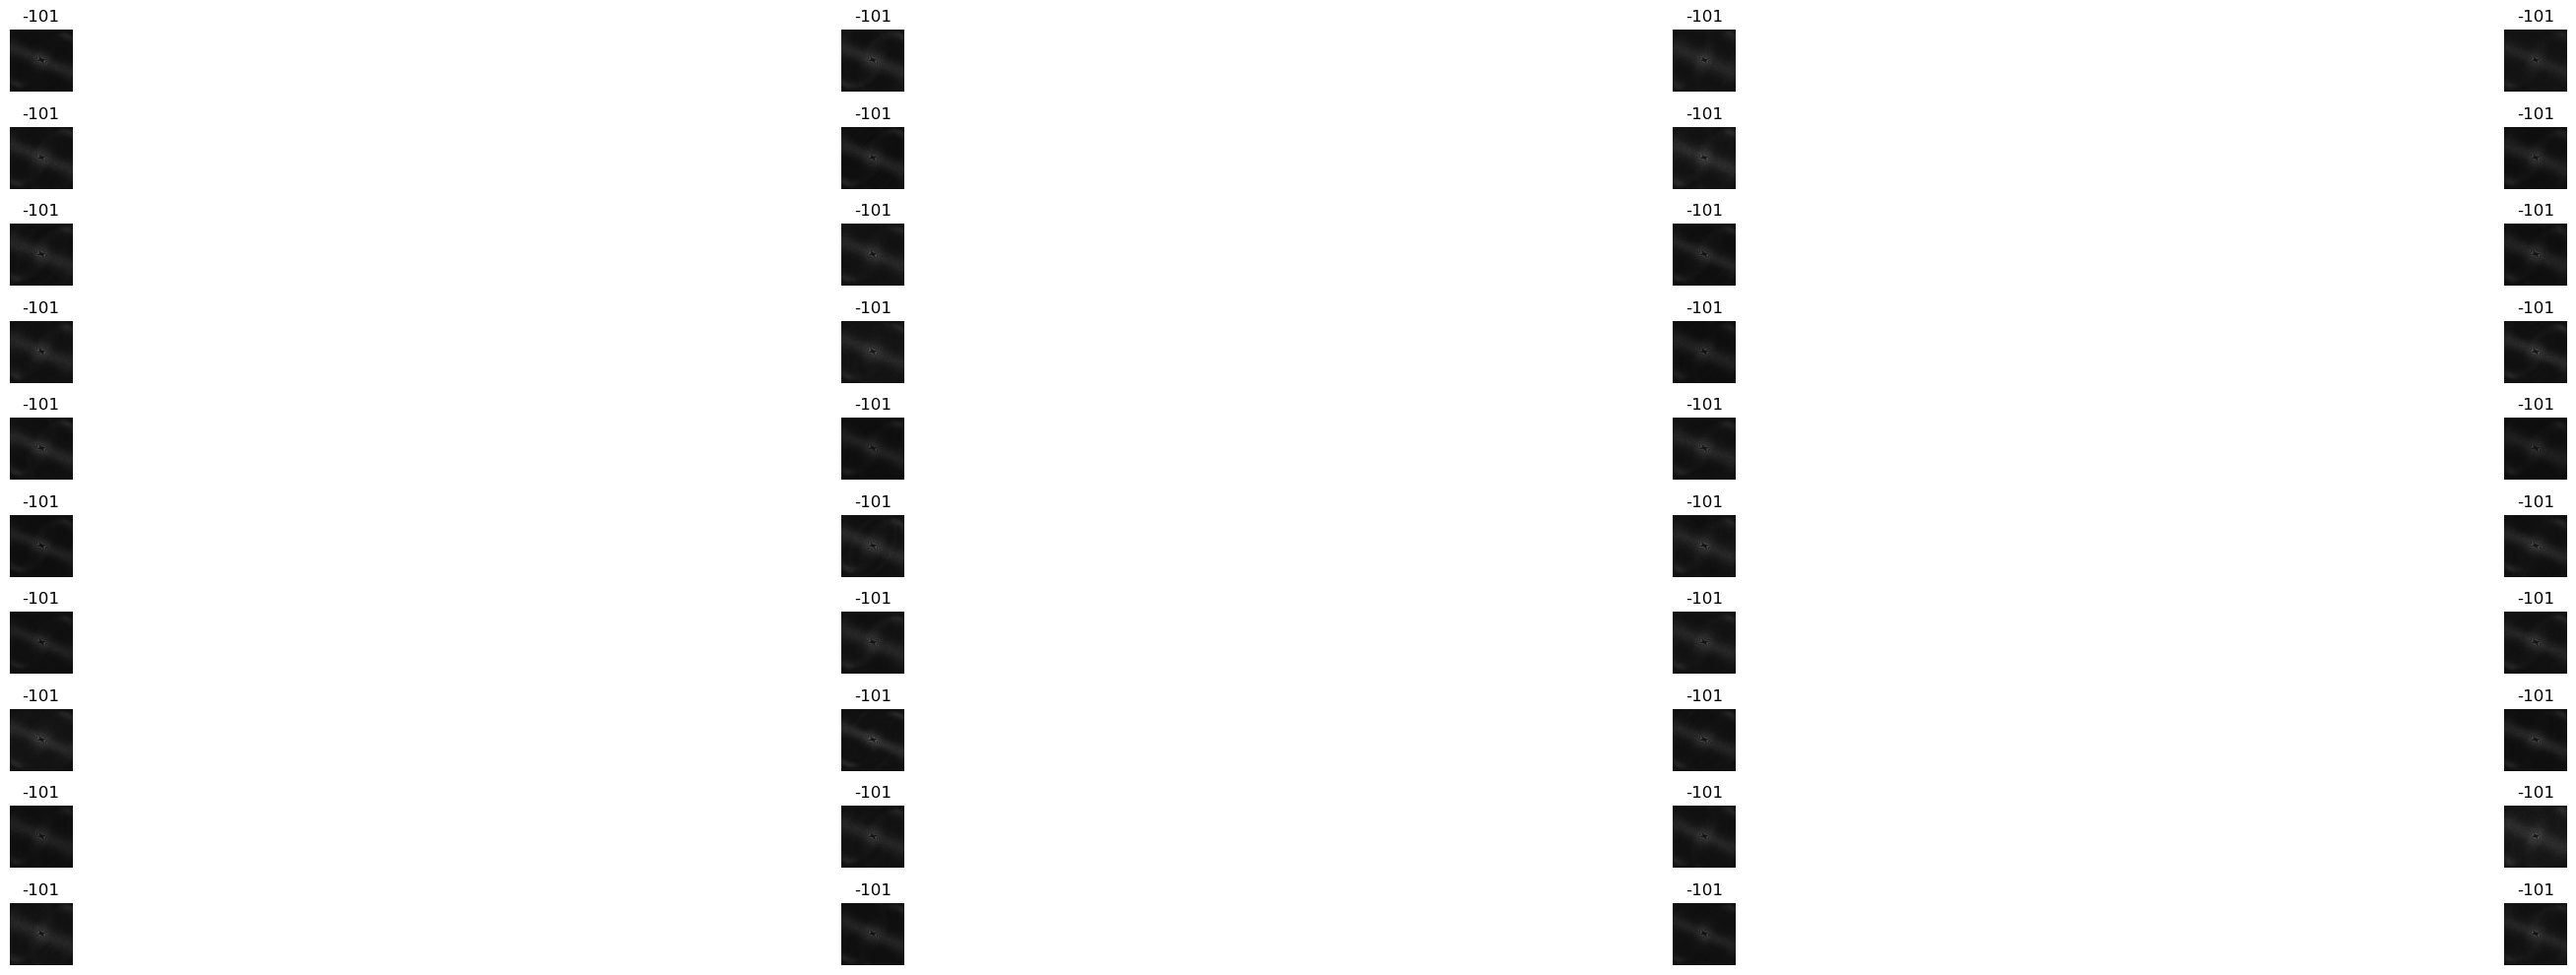

In [5]:
# 获取训练集的迭代器
train_iter = iter(train_dataloader)

# 查看前两批
for batch_num in range(4):  # 这里3表示显示前3批数据
    imgs, labels = next(train_iter)  # 获取当前批次
    plt.figure(figsize=(40, 10))  # 设置画布大小

    # 确保最多显示40张图片
    num_images = min(40, len(imgs))  # 如果有不足40张数据，则显示实际数量

    # 显示当前批次的图片
    for i, (img, label) in enumerate(zip(imgs[:num_images], labels[:num_images])):
        img = img.permute(1, 2, 0).numpy()  # 转换为 (H, W, C) 格式
        img = (img + 1) / 2  # 反归一化到 [0, 1] 范围
        plt.subplot(10, 4, i+1)  # 10行4列显示
        plt.title(idx_to_class[label.item()])  # 显示标签
        plt.imshow(img)  # 显示图片
        plt.axis('off')  # 不显示坐标轴

    # 调整布局，避免重叠
    plt.tight_layout()
    plt.show()


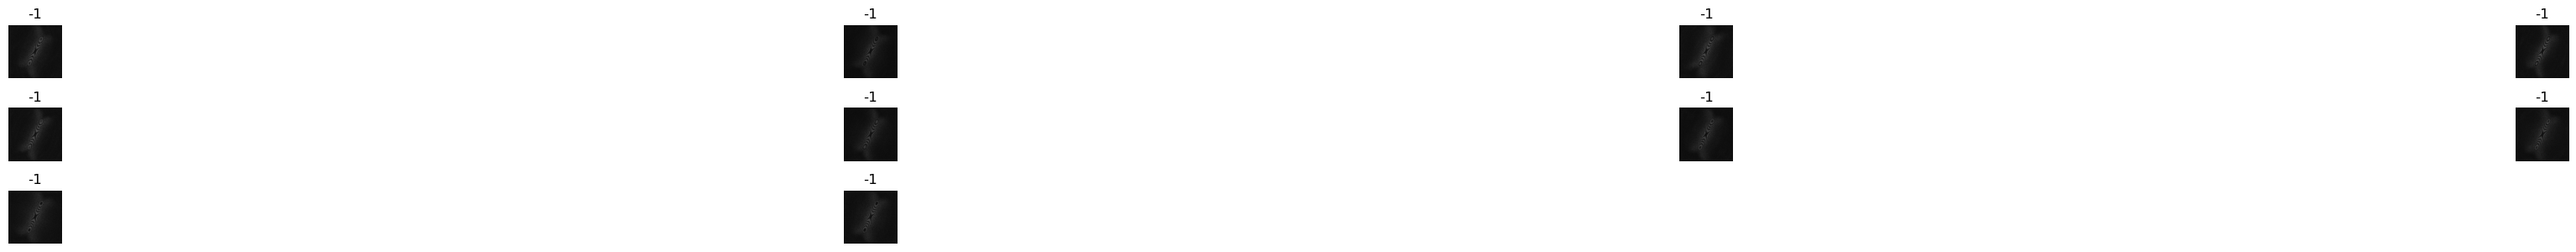

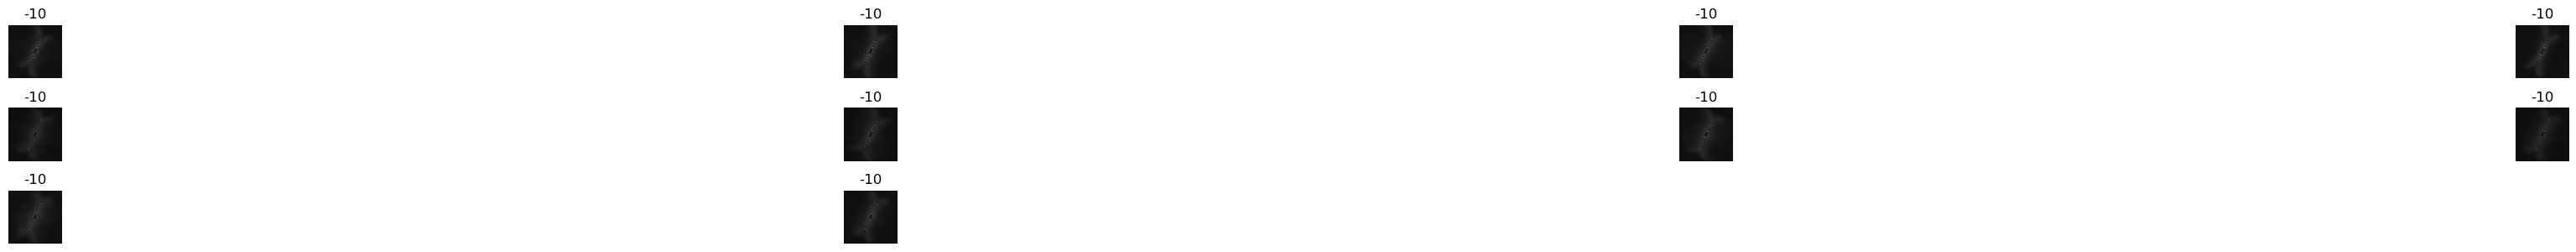

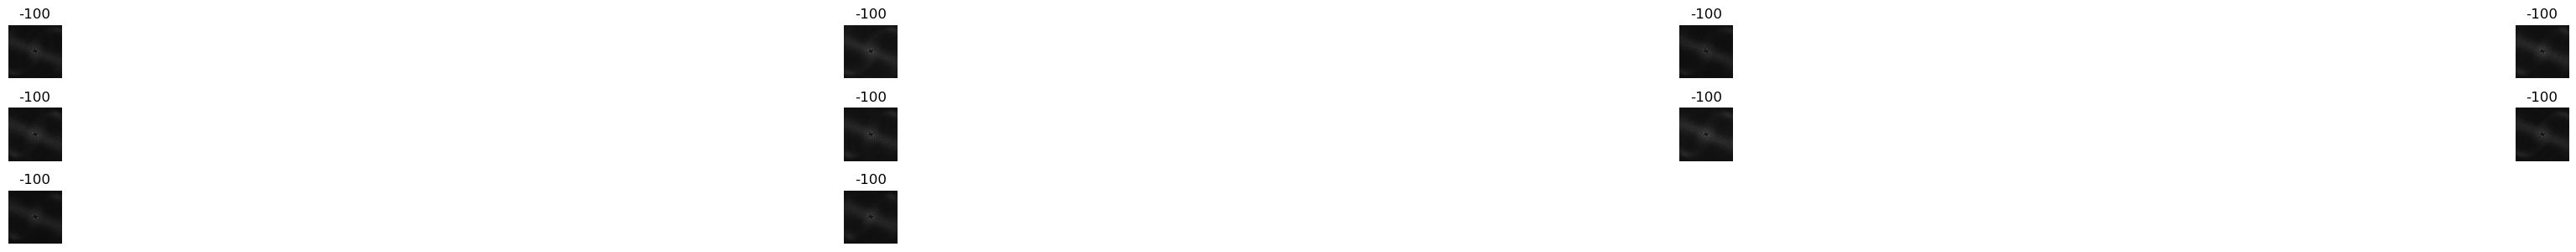

In [6]:
# 获取测试集的迭代器
test_iter = iter(test_dataloader)

# 查看前3批数据
for batch_num in range(3):  # 这里3表示显示前3批数据
    imgs, labels = next(test_iter)  # 获取当前批次
    plt.figure(figsize=(40, 10))  # 设置画布大小

    # 确保最多显示40张图片
    num_images = min(40, len(imgs))  # 如果有不足40张数据，则显示实际数量

    # 显示当前批次的图片
    for i, (img, label) in enumerate(zip(imgs[:num_images], labels[:num_images])):
        img = img.permute(1, 2, 0).numpy()  # 转换为 (H, W, C) 格式
        img = (img + 1) / 2  # 反归一化到 [0, 1] 范围
        plt.subplot(10, 4, i+1)  # 10行4列显示
        plt.title(idx_to_class[label.item()])  # 显示标签
        plt.imshow(img)  # 显示图片
        plt.axis('off')  # 不显示坐标轴

    # 调整布局，避免重叠
    plt.tight_layout()
    plt.show()


In [7]:
# 初始化
num_classes = 1

MAX_EPOCH = 10     
LR = 0.0001          
log_interval = 100    # 每隔 1 个 训练批次（或 epoch）记录一次训练日志。 表示训练过程中，控制打印训练信息的频率。
val_interval = 1    # 每隔 1 个 epoch 进行一次验证集的评估。验证集的评估是为了监控模型在验证集上的表现，从而避免过拟合。
classes = 1         # 分类任务的类别数为 2。
start_epoch = -1     
lr_decay_step = 10   # 表示学习率的衰减步长。 每隔一定的 epoch（如 1）对学习率进行衰减，通常是为了使模型在后期更稳定地收敛。
                    # 可结合优化器的学习率调度策略（如 StepLR）使用。

In [8]:
# 模型
device = device = torch.device("mps")
def get_model(path_state_dict, vis_model=False):
    """
    创建模型，加载参数
    :param path_state_dict:是一个字符串，表示预训练模型的权重文件路径（即模型的状态字典）。
    :return:
    """
    model = models.alexnet() # 创建一个 AlexNet 模型实例
    
    pretrained_state_dict = torch.load(path_state_dict) 
    # path_state_dict 是预训练的模型权重文件的路径。
    # 加载指定路径 path_state_dict 中保存的模型参数（即权重）。这些参数是从一个已经训练好的模型中保存下来的。
    
    model.load_state_dict(pretrained_state_dict)
    # load_state_dict 方法会将 pretrained_state_dict 中的权重和偏置映射到相应的层中，使得模型的结构和参数与预训练模型一致。

    if vis_model:
        from torchsummary import summary
        summary(model, input_size=(3, 224, 224), device="cpu")
        """
            summary 可以输出模型的层次结构、每一层的参数量、输出的形状等信息。
            导入 torchsummary 库中的 summary 函数。torchsummary 是一个用于显示 PyTorch 模型结构和参数信息的库。
            model：表示模型对象，在这里是 AlexNet 模型。
            
            input_size=(3, 224, 224)：定义输入张量的尺寸，表示输入图像的通道数（3，RGB图像）和图像的尺寸（224x224像素）。
            对于 AlexNet 来说，输入图像通常是 224x224 的 RGB 图像。
        """

    model.to(device)
    return model # 返回创建并加载了预训练权重的模型对象 model。这个模型将可以用于推理（预测）或者进一步的训练。
BASE_DIR = "/Users/fcccasa/jupyter_project" 
path_state_dict = os.path.join(BASE_DIR, "Alexnet", "alexnet-owt-4df8aa71.pth")
alexnet_model = get_model(path_state_dict,False) # 创建一个 AlexNet 模型实例
num_ftrs = alexnet_model.classifier._modules["6"].in_features # 获取最后一层的输入特征数，表示进入这一层的向量维度。
alexnet_model.classifier._modules["6"] = nn.Linear(num_ftrs, num_classes) 
alexnet_model.to(device)

/var/folders/b2/tlqpkmnd4r1g94k1sqkfzvz40000gn/T/ipykernel_12407/271513828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict = torch.load(path_state

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
criterion = nn.L1Loss()

In [10]:
optimizer = optim.SGD(alexnet_model.parameters(), lr=LR, momentum=0.9)  # 选择优化器
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_decay_step, gamma=0.1)  # 设置学习率下降策略

In [11]:
train_curve = list() 
valid_curve = list()

for epoch in range(start_epoch + 1, MAX_EPOCH):

    loss_mean = 0.
    correct = 0.
    total = 0.

    alexnet_model.train() # 将模型切换到训练模式，启用 dropout 等操作。
    for i, data in enumerate(train_dataloader):
        # 遍历训练数据加载器，data 包含一个批次的 inputs（输入图像）和 labels（对应的标签）。

        # forward
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet_model(inputs)

        # 调整标签的形状
        labels = labels.view(-1, 1)  # 确保标签的形状与输出一致

        # backward
        optimizer.zero_grad()
        # 清空上一批次的梯度，防止累积。
        loss = criterion(outputs, labels)
        loss.backward()
        # 通过自动求导计算梯度。

        # update weights
        optimizer.step()
        # 使用优化器根据计算出的梯度更新模型参数。

        # 打印训练信息
        loss_mean += loss.item()        # 获取当前批次的损失值。
        train_curve.append(loss.item()) # 将当前批次的损失值记录到 train_curve。
        if (i+1) % log_interval == 0:
            loss_mean = loss_mean / log_interval
            print("Training: Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f}".format(
                epoch, MAX_EPOCH, i+1, len(train_dataloader), loss_mean))
            loss_mean = 0.

    scheduler.step()  # 更新学习率 调用学习率调度器，根据设置调整当前学习率（如按一定步长下降）。

    # validate the model
    if (epoch+1) % val_interval == 0:

        correct_val = 0.
        total_val = 0.
        loss_val = 0.
        alexnet_model.eval() 
        
        # 禁用自动求导，减少内存占用，加速计算。
        with torch.no_grad():
            for j, data in enumerate(test_dataloader):
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = alexnet_model(inputs)
               
                # 调整标签的形状
                labels = labels.view(-1, 1)  # 确保标签的形状与输出一致

                loss = criterion(outputs, labels)

                loss_val += loss.item()

            loss_val_mean = loss_val / len(test_dataloader)
            valid_curve.append(loss_val_mean)
            print("Valid: Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f}".format(
                epoch, MAX_EPOCH, j+1, len(test_dataloader), loss_val_mean))

        alexnet_model.train()  # 将模型切换回训练模式


Training: Epoch[000/010] Iteration[100/501] Loss: 4.5288
Training: Epoch[000/010] Iteration[200/501] Loss: 12.9037
Training: Epoch[000/010] Iteration[300/501] Loss: 16.5855
Training: Epoch[000/010] Iteration[400/501] Loss: 54.3721
Training: Epoch[000/010] Iteration[500/501] Loss: 23.8336
Valid: Epoch[000/010] Iteration[501/501] Loss: 293.3348
Training: Epoch[001/010] Iteration[100/501] Loss: 33.9007
Training: Epoch[001/010] Iteration[200/501] Loss: 6.8989
Training: Epoch[001/010] Iteration[300/501] Loss: 11.3107
Training: Epoch[001/010] Iteration[400/501] Loss: 14.6791
Training: Epoch[001/010] Iteration[500/501] Loss: 21.3838
Valid: Epoch[001/010] Iteration[501/501] Loss: 268.3422
Training: Epoch[002/010] Iteration[100/501] Loss: 70.0628
Training: Epoch[002/010] Iteration[200/501] Loss: 32.8432
Training: Epoch[002/010] Iteration[300/501] Loss: 26.5044
Training: Epoch[002/010] Iteration[400/501] Loss: 82.7642
Training: Epoch[002/010] Iteration[500/501] Loss: 30.2330
Valid: Epoch[002/010

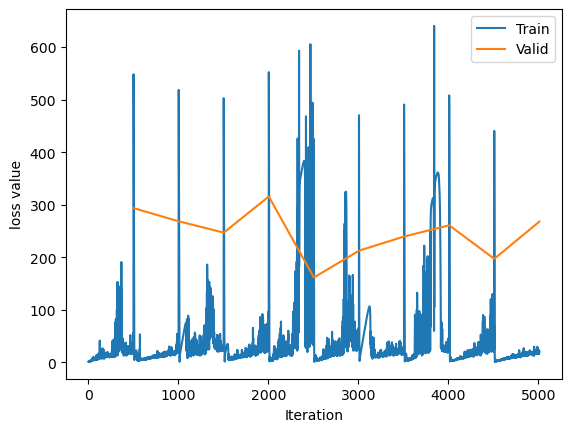

In [40]:
train_x = range(len(train_curve))
train_y = train_curve

train_iters = len(train_dataloader)
valid_x = np.arange(1, len(valid_curve)+1) * train_iters*val_interval # 由于valid中记录的是epochloss，需要对记录点进行转换到iterations
valid_y = valid_curve

plt.plot(train_x, train_y, label='Train')
plt.plot(valid_x, valid_y, label='Valid')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('Iteration')
plt.show()